In this exercise, we will use Matplotlib and Seaborn module to visualize data.
# Table of Contents
1. Matplotlib
    - Scatter plot
    - Bar plot with error bars
    - 3D Graphical Analysis
    - Histograms
2. Seaborn Libraries
    - Rug Plots
    - Histogram using factor plot
    - Combined Plots (kde, hist, rug) using distplot
    - Box & Whiskers Plots
    - Violin Plots
    - Joint Plots
    - Regression Plots
    - Heatmaps
    - Clustered Matrices
    
# Initialization and loading the data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url)
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [2]:
# The data need separator
df = pd.read_csv(url,sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. Matplotlib
## Scatter Plot

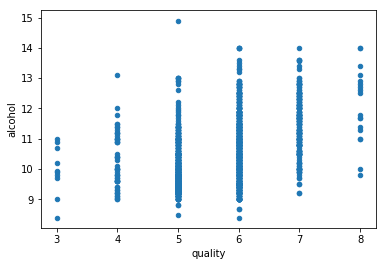

In [3]:
%matplotlib inline
# does not have to import matplotlib.
df.plot(kind='scatter',x='quality',y='alcohol');

## Bar plot with error bars

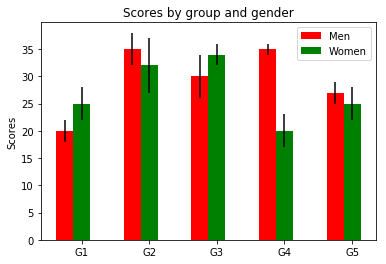

In [4]:
import matplotlib.pyplot as plt
N = 5
ind = np.arange(N) # The x locations for the groups
width = 0.25
fig, ax = plt.subplots()

menMeans = (20,35,30,35,27)
menStd = (2,3,4,1,2)
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25,32,34,20,25)
womenStd = (3,5,2,3,3)
rects2 = ax.bar(ind+width, womenMeans, width, color='g',yerr=womenStd)

# add axis labels, title and axis tickmarks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind+width)
ax.set_xticklabels(('G1','G2','G3','G4','G5'))
ax.legend((rects1[0],rects2[0]),('Men','Women'))

# plt.show() # if you are not using %matplotlib inline

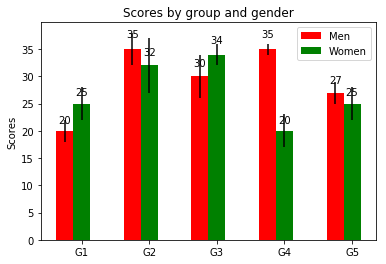

In [5]:
# You can add data labels above each bar
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, 
                '%d' % int(height),ha='center', va='bottom')

N = 5
ind = np.arange(N) # The x locations for the groups
width = 0.25
fig, ax = plt.subplots()

menMeans = (20,35,30,35,27)
menStd = (2,3,4,1,2)
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25,32,34,20,25)
womenStd = (3,5,2,3,3)
rects2 = ax.bar(ind+width, womenMeans, width, color='g',yerr=womenStd)

# add axis labels, title and axis tickmarks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind+width)
ax.set_xticklabels(('G1','G2','G3','G4','G5'))
ax.legend((rects1[0],rects2[0]),('Men','Women'))

# add labels on top
autolabel(rects1)
autolabel(rects2)

# plt.show() # if you are not using %matplotlib inline

## 3D Graphical Analysis

[[  1.91784855e+00   1.92063718e+00   1.92332964e+00 ...,  -8.07710558e-03
   -5.48108704e-03  -2.78862876e-03]
 [  1.92063718e+00   1.92342581e+00   1.92611827e+00 ...,  -5.28847682e-03
   -2.69245827e-03  -5.85087534e-14]
 [  1.92332964e+00   1.92611827e+00   1.92881072e+00 ...,  -2.59601854e-03
   -5.63993297e-14   2.69245827e-03]
 ..., 
 [ -8.07710558e-03  -5.28847682e-03  -2.59601854e-03 ...,  -1.93400276e+00
   -1.93140674e+00  -1.92871428e+00]
 [ -5.48108704e-03  -2.69245827e-03  -5.63993297e-14 ...,  -1.93140674e+00
   -1.92881072e+00  -1.92611827e+00]
 [ -2.78862876e-03  -5.85087534e-14   2.69245827e-03 ...,  -1.92871428e+00
   -1.92611827e+00  -1.92342581e+00]]


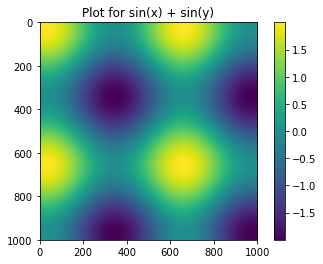

In [6]:
points = np.arange(-5,5,0.01)  #Create an array of 1000 data points from -5 to 5 with interval 0.01
dx,dy = np.meshgrid(points,points) #Create the grid
z = (np.sin(dx) + np.sin(dy)) #Evaluating function

plt.imshow(z) #plot the array

plt.colorbar() #add a colorbar & title
plt.title('Plot for sin(x) + sin(y)') #add chart title
print(z)

## Histogram

(array([  3.,   1.,  11.,  17.,  15.,  24.,  16.,   8.,   3.,   2.]),
 array([-2.47768966, -1.97750369, -1.47731773, -0.97713176, -0.4769458 ,
         0.02324017,  0.52342613,  1.0236121 ,  1.52379806,  2.02398403,
         2.52416999]),
 <a list of 10 Patch objects>)

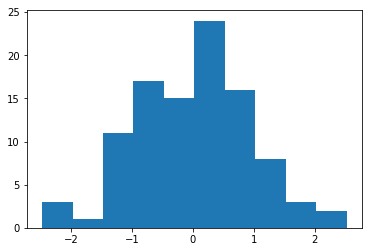

In [7]:
from numpy.random import randn #For generating random number datasets (normal distribution)
import matplotlib.pyplot as plt
%matplotlib inline

dataset1 = randn(100)
plt.hist(dataset1)

(array([  3.,   4.,  10.,   9.,  11.,  17.,  10.,   9.,   4.,   3.]),
 array([-2.70791054, -2.20694819, -1.70598584, -1.20502349, -0.70406114,
        -0.20309879,  0.29786356,  0.79882591,  1.29978826,  1.80075061,
         2.30171296]),
 <a list of 10 Patch objects>)

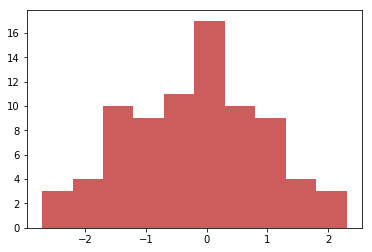

In [8]:
dataset2 = randn(80)
plt.hist(dataset2, color='indianred')

(array([ 0.0998079 ,  0.04990395,  0.14971185,  0.04990395,  0.24951975,
         0.24951975,  0.24951975,  0.1996158 ,  0.14971185,  0.3992316 ,
         0.4990395 ,  0.34932765,  0.24951975,  0.24951975,  0.24951975,
         0.1996158 ,  0.0998079 ,  0.0998079 ,  0.        ,  0.14971185]),
 array([-2.70791054, -2.45742937, -2.20694819, -1.95646701, -1.70598584,
        -1.45550466, -1.20502349, -0.95454231, -0.70406114, -0.45357996,
        -0.20309879,  0.04738239,  0.29786356,  0.54834474,  0.79882591,
         1.04930709,  1.29978826,  1.55026944,  1.80075061,  2.05123179,
         2.30171296]),
 <a list of 20 Patch objects>)

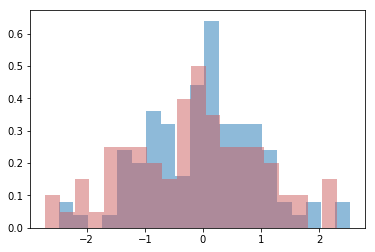

In [9]:
plt.hist(dataset1, normed=True, alpha=0.5, bins=20)
plt.hist(dataset2, normed=True, color='indianred', alpha=0.5, bins=20)

# 2. Seaborn
**Required dependencies**: numpy, scipy, matplotlib, pandas;

**Reccomended**: statsmodels, patsy

In [10]:
import seaborn as sns
from scipy import stats

## Rug Plots

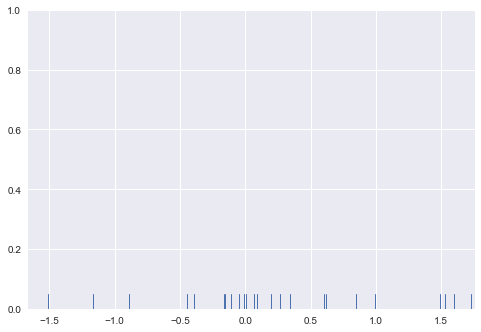

In [11]:
# Plots a simple row of tic marks along the x-axis
dataset = randn(25)
sns.rugplot(dataset)

## Histograms using factorplot

**Note**: Histograms are already part of matplotlib: plt.hist(dataset)

Seaborn's factorplot let's you choose between histograms, point plots, violin plots, etc.

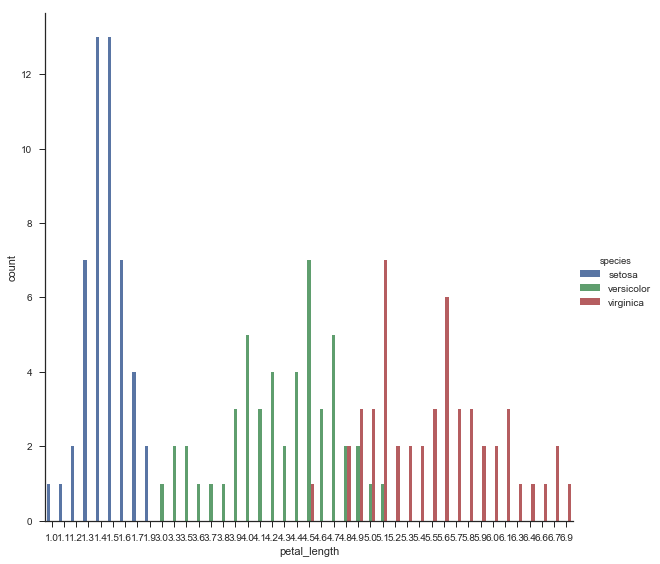

In [21]:
# we are using iris data set
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris") # Load_iris returns an object with several field
xorder = np.apply_along_axis(sorted, 0, iris['petal_length'].unique())
sns.factorplot('petal_length', data=iris, order=xorder, size=8, hue='species', kind='count')
# Note: without size=8, the x-axis labels overlap

## KDE Plots (Kernel Density Estimation Plots)

KDE's are a tool for representing Probability Density Functions (PDF's)

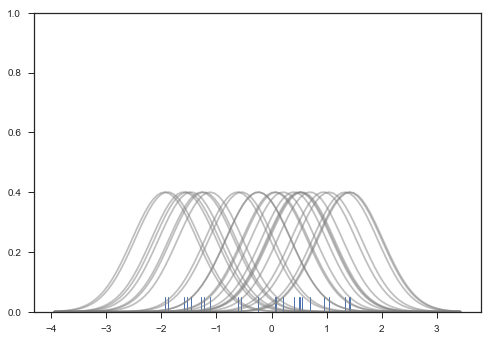

In [23]:
dataset=randn(25)
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2 #Silverman's rule of thumb
kernel_list = []
for data_point in dataset:
    #Create a kernel for each point and append to list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    plt.ylim(0,1)

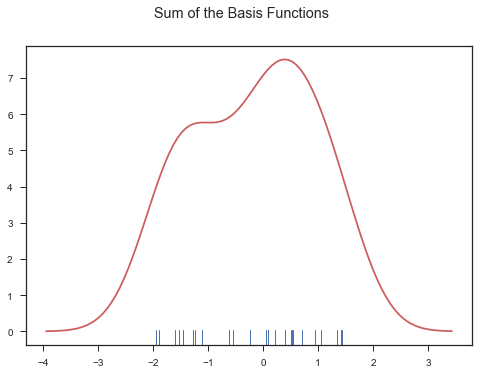

In [25]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.suptitle('Sum of the Basis Functions')

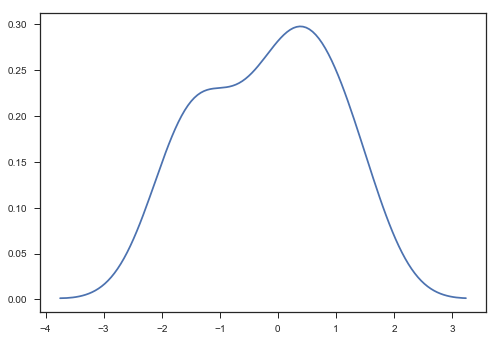

In [26]:
sns.kdeplot(dataset)

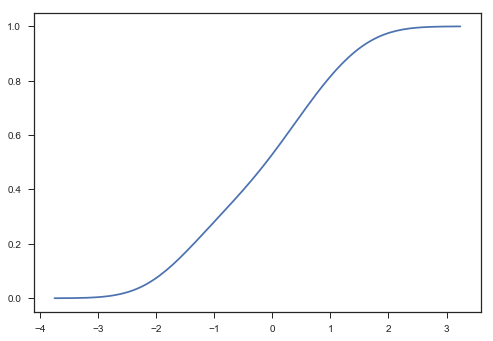

In [27]:
sns.kdeplot(dataset, cumulative=True)

Seaborn allows you to quickly change bandwidth, kernels, orientation, and a number of other parameters.
Seaborn also supports multivariate density estimation.

## Combined Plots (kde, hist,rug) using distplot

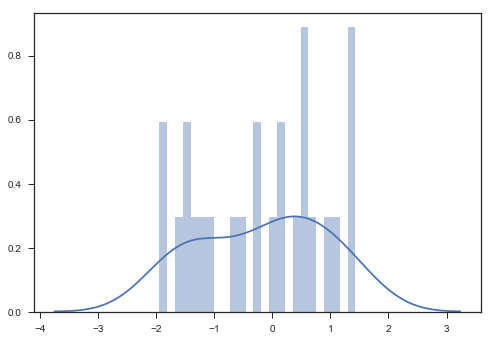

In [31]:
sns.distplot(dataset,bins=25) #by default a KDE over a histogram

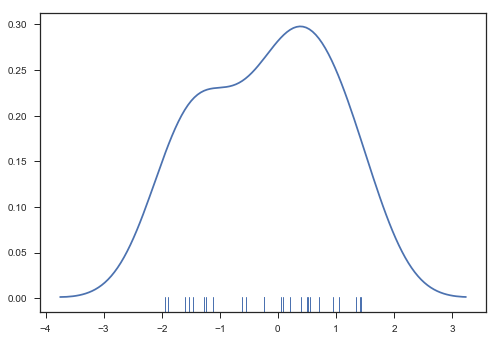

In [32]:
sns.distplot(dataset,rug=True, hist=False) #a rug and a KDE

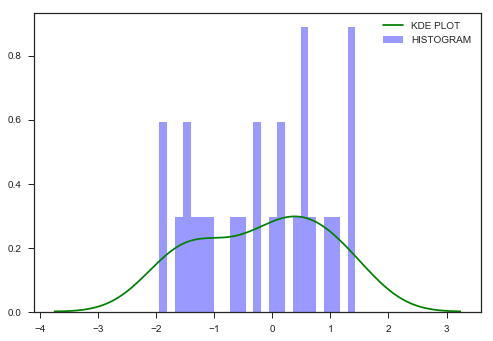

In [36]:
# To control specific plots in distplot, use a [plot]_kws argument with dictionaries:
sns.distplot(dataset, bins=25, kde_kws={'color':'green','label':'KDE PLOT'}, 
             hist_kws={'color':'blue', 'label':'HISTOGRAM'})

## Box & Whisker Plots
Box plots are another tool for representing Probability Density Functions (PDF's)

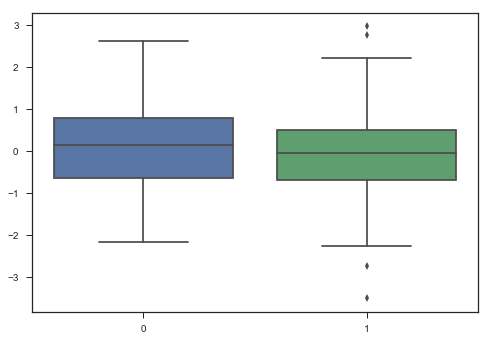

In [42]:
data1 = randn(100)
data2 = randn(100)
sns.boxplot(data=[data1,data2]);

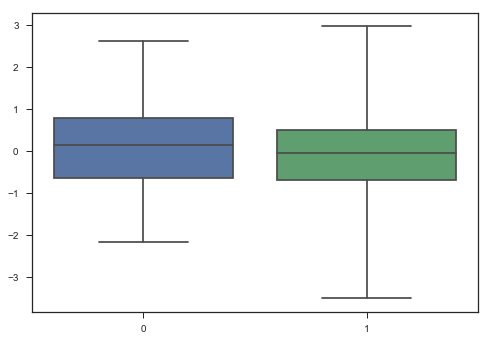

In [43]:
# To absorb outliers into the whiskers (above right)
sns.boxplot(data=[data1,data2], whis=np.inf)

C:\Users\LW130003\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


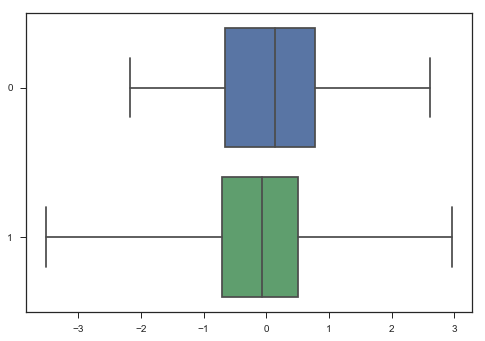

In [46]:
# To set horizontal:
sns.boxplot(data=[data1,data2], whis=np.inf,vert=False)

## Violi Plots
Violin plots may reveal what a box plot doesn't by incorporating some of the functionality of KDE plots.

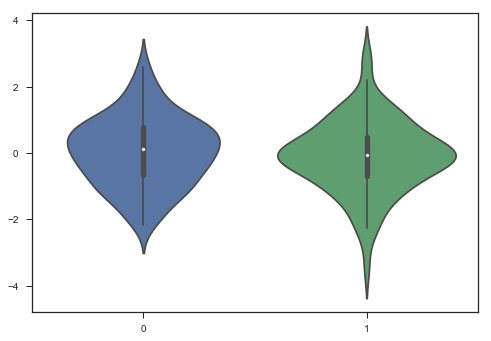

In [47]:
sns.violinplot(data=[data1,data2])

# Join plots

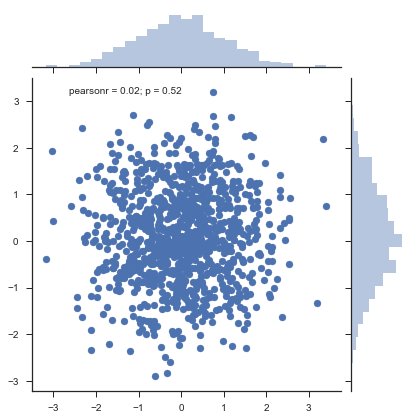

In [51]:
data1 = randn(1000)
data2 = randn(1000)
sns.jointplot(data1,data2)

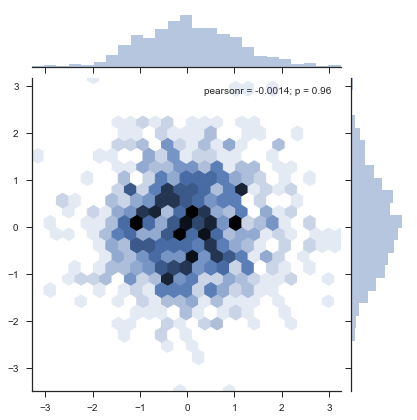

In [50]:
sns.jointplot(data1,data2,kind='hex')

# Regression Plots

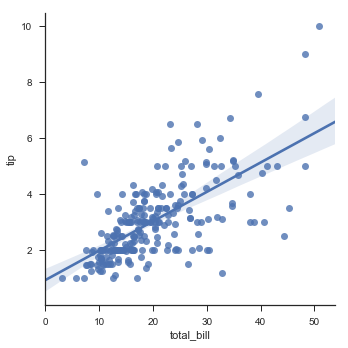

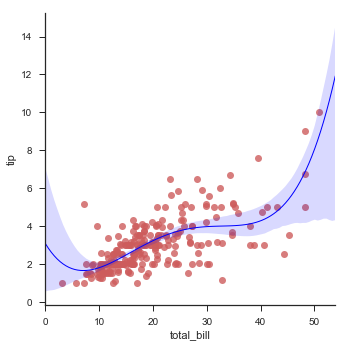

In [55]:
tips = sns.load_dataset('tips') #load seaborn tips dataset
# sns.lmplot(x,y,data)
sns.lmplot("total_bill","tip",tips); #scatter plot with linear regression line & confidence interval
sns.lmplot("total_bill","tip",tips,order=4,
           scatter_kws={"color":"indianred"},line_kws={"linewidth":1,"color":"blue"})

Refer to online doccumentation for more on adjusting the confidence interval, plotting discrete variables, jittering, removing the regression line, and using hue & marker to define subsets along a column.
Seaborn event supports loca regression (LOESS) with the argument lowess=True
For lower level regression plots, use sns.regplot(x,y,data)

## Heatmaps

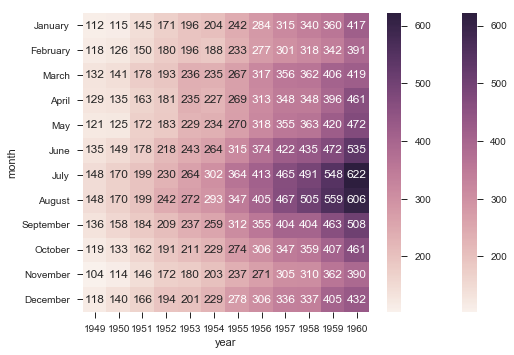

In [57]:
flight_dframe = sns.load_dataset('flights') #Load flights dataset from seaborn
flight_dframe = flight_dframe.pivot('month','year','passengers') #pivot the data to make it usable
sns.heatmap(flight_dframe)

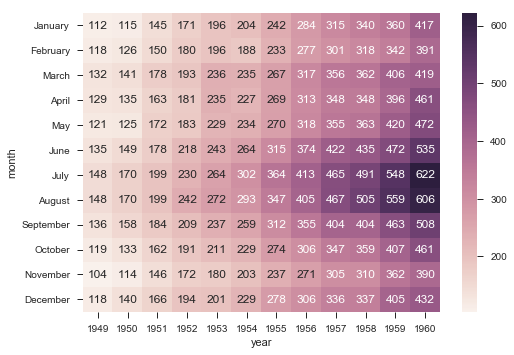

In [58]:
#add fill data with
sns.heatmap(flight_dframe, annot=True, fmt='d')

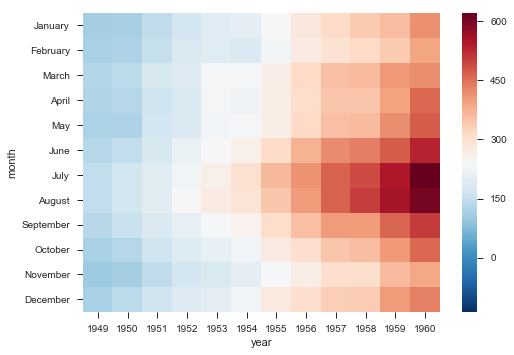

In [59]:
#specify "center" for colormap
sns.heatmap(flight_dframe, center=flight_dframe.loc['January',1955])

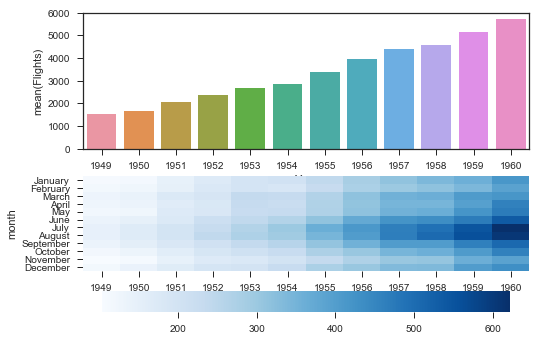

In [60]:
# Heatmap can be added onto a subplot axis to create more informative figures:
f, (axis1,axis2) = plt.subplots(2,1) #figure f will have 2 rows, 1 column

#Since yearly flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe
yearly_flights = flight_dframe.sum()
years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)
flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

#Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

#Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe,ax=axis1)

#Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'}) #Place colorbar horizontally

## Clustered Matrices

C:\Users\LW130003\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


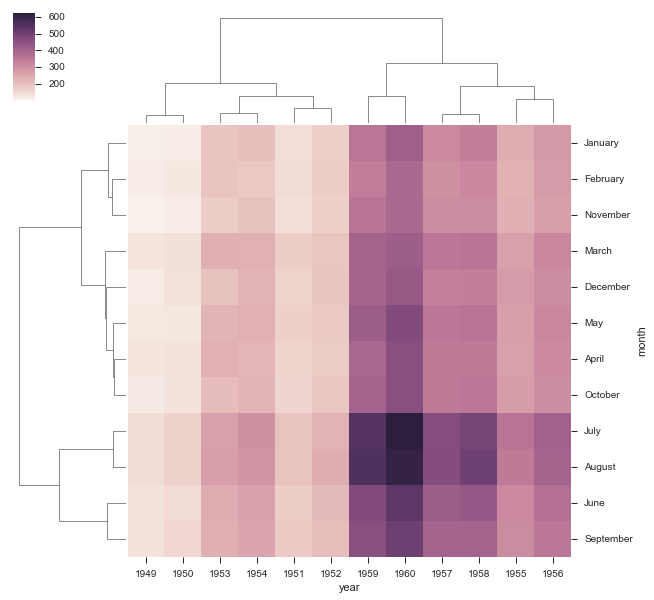

In [61]:
cg =sns.clustermap(flight_dframe)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation=0);

C:\Users\LW130003\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


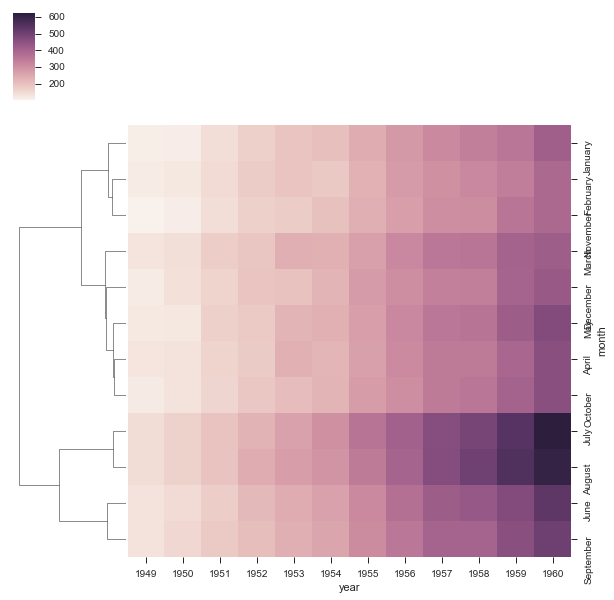

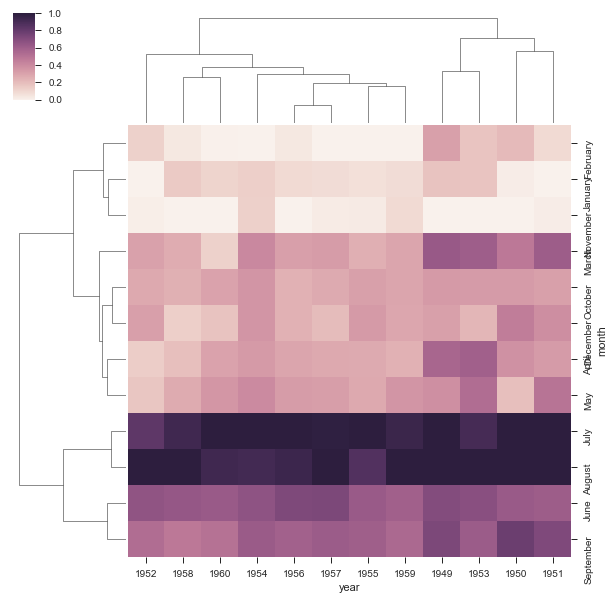

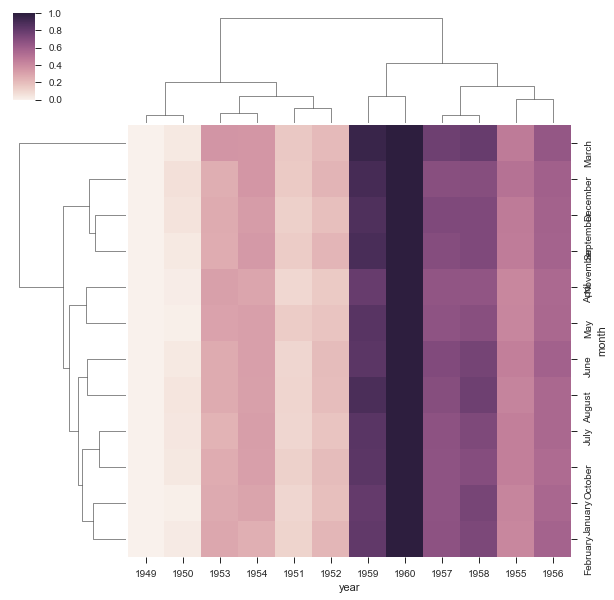

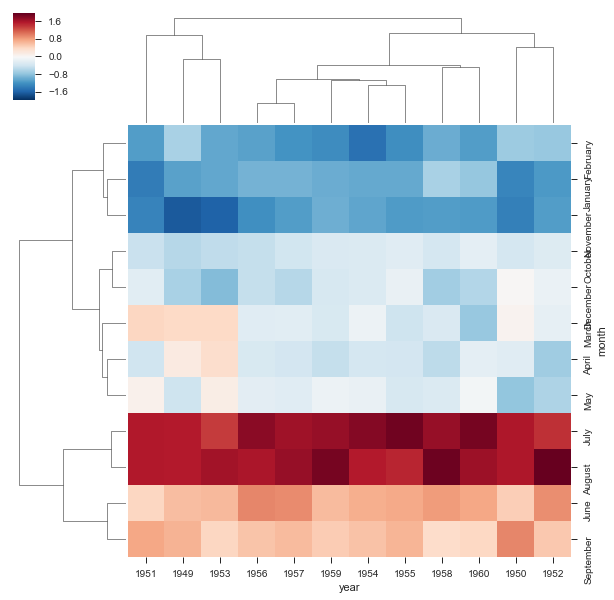

In [62]:
sns.clustermap(flight_dframe, col_cluster=False)

#You can set a standard scale (since the number of flights increase every year)
sns.clustermap(flight_dframe, standard_scale=1) #standardize by columns (year)
sns.clustermap(flight_dframe, standard_scale=0) #standardize by rows (month)

#You can normalize rows by their Z-score:
sns.clustermap(flight_dframe, z_score=1) #This substract the means and divides by the STD of each column, so the rows have a mean of 0 and a variance of 1